In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/DataScience/Data/cleaned_data_weather.csv'
df = pd.read_csv(file_path)

In [3]:
df_original_data = df

In [4]:
df['next_1_day_mean_temp'] = df_original_data['mean_temp'].shift(-1)
df['next_2_day_mean_temp'] = df_original_data['mean_temp'].shift(-2)
df['next_3_day_mean_temp'] = df_original_data['mean_temp'].shift(-3)

In [5]:
df.dropna(inplace=True)

#### cloud_cover processing

In [6]:
df['cloud_cover'].value_counts()

7.0    3116
6.0    2952
5.0    2292
8.0    1903
4.0    1815
3.0    1148
2.0     860
1.0     603
0.0     375
5.8       2
6.8       2
5.4       2
7.4       2
9.0       2
5.6       1
6.2       1
6.6       1
7.2       1
Name: cloud_cover, dtype: int64

In [7]:
condition = (df['cloud_cover'] % 1 != 0) | (df['cloud_cover'] > 8.0)

# 从DataFrame中去除满足条件的行
df = df[~condition]

In [8]:
df['cloud_cover'].value_counts()

7.0    3116
6.0    2952
5.0    2292
8.0    1903
4.0    1815
3.0    1148
2.0     860
1.0     603
0.0     375
Name: cloud_cover, dtype: int64

#### change the sunshine into hours

In [9]:
df['sunshine'] = df['sunshine'] * 60

<ipython-input-9-d19a2b1fcbb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sunshine'] = df['sunshine'] * 60


#### change snow depth into a category value

In [10]:
df['snow_depth'].value_counts()

0.0     14933
1.0        45
2.0        23
4.0        15
3.0        15
5.0         6
6.0         4
7.0         4
8.0         4
10.0        2
0.4         2
12.0        2
11.0        2
9.0         1
18.0        1
13.0        1
15.0        1
16.0        1
22.0        1
0.8         1
Name: snow_depth, dtype: int64

In [11]:
df.loc[df['snow_depth'] > 0, 'snow_depth'] = 1.0

In [12]:
df['snow_depth'].value_counts()

0.0    14933
1.0      131
Name: snow_depth, dtype: int64

#### change the precipitation into category value

In [13]:
df['precipitation'].value_counts()

0.00     7907
0.20     1005
0.40      452
0.10      313
0.60      297
         ... 
53.10       1
18.70       1
25.40       1
20.00       1
0.46        1
Name: precipitation, Length: 261, dtype: int64

In [14]:
bins = [-float('inf'), 0.1, 2.5, 10, 50, float('inf')]
labels = [0, 1, 2, 3, 4]

df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)

<ipython-input-14-c7ee6bde3366>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)


In [15]:
df['precipitation'].value_counts()

0    7907
1    4251
2    2335
3     567
4       4
Name: precipitation, dtype: int64

#### one-hot encoding

In [16]:
df_encoded = pd.get_dummies(df['cloud_cover'], prefix='cloud_cover')

df = pd.concat([df, df_encoded], axis=1)

df.drop('cloud_cover', axis=1, inplace=True)

In [17]:
df_encoded = pd.get_dummies(df['precipitation'], prefix='precipitation')

df = pd.concat([df, df_encoded], axis=1)

df.drop('precipitation', axis=1, inplace=True)

In [18]:
df_encoded = pd.get_dummies(df['snow_depth'], prefix='snow_depth')

df = pd.concat([df, df_encoded], axis=1)

df.drop('snow_depth', axis=1, inplace=True)

#### delete the date

In [19]:
del df['date']

In [20]:
df.head()

,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure,next_1_day_mean_temp,next_2_day_mean_temp,next_3_day_mean_temp,cloud_cover_0.0,...,cloud_cover_6.0,cloud_cover_7.0,cloud_cover_8.0,precipitation_0,precipitation_1,precipitation_2,precipitation_3,precipitation_4,snow_depth_0.0,snow_depth_1.0
0,420.0,52.0,2.3,-4.1,-7.5,101900.0,-2.6,-2.8,-2.6,0,...,0,0,0,0,1,0,0,0,0,1
1,102.0,27.0,1.6,-2.6,-7.5,102530.0,-2.8,-2.6,-0.8,0,...,1,0,0,1,0,0,0,0,0,1
2,0.0,13.0,1.3,-2.8,-7.2,102050.0,-2.6,-0.8,-0.5,0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,13.0,-0.3,-2.6,-6.5,100840.0,-0.8,-0.5,1.5,0,...,0,0,1,1,0,0,0,0,0,1
4,120.0,29.0,5.6,-0.8,-1.4,102250.0,-0.5,1.5,6.9,0,...,1,0,0,1,0,0,0,0,0,1


#### normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'pressure']

scaler = MinMaxScaler()


df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

#### check if any INF or NAN

In [22]:
inf_check = np.isinf(df)
print(inf_check.any())

sunshine                False
global_radiation        False
max_temp                False
mean_temp               False
min_temp                False
pressure                False
next_1_day_mean_temp    False
next_2_day_mean_temp    False
next_3_day_mean_temp    False
cloud_cover_0.0         False
cloud_cover_1.0         False
cloud_cover_2.0         False
cloud_cover_3.0         False
cloud_cover_4.0         False
cloud_cover_5.0         False
cloud_cover_6.0         False
cloud_cover_7.0         False
cloud_cover_8.0         False
precipitation_0         False
precipitation_1         False
precipitation_2         False
precipitation_3         False
precipitation_4         False
snow_depth_0.0          False
snow_depth_1.0          False
dtype: bool


In [23]:
inf_check = np.isnan(df)
print(inf_check.any())

sunshine                False
global_radiation        False
max_temp                False
mean_temp               False
min_temp                False
pressure                False
next_1_day_mean_temp    False
next_2_day_mean_temp    False
next_3_day_mean_temp    False
cloud_cover_0.0         False
cloud_cover_1.0         False
cloud_cover_2.0         False
cloud_cover_3.0         False
cloud_cover_4.0         False
cloud_cover_5.0         False
cloud_cover_6.0         False
cloud_cover_7.0         False
cloud_cover_8.0         False
precipitation_0         False
precipitation_1         False
precipitation_2         False
precipitation_3         False
precipitation_4         False
snow_depth_0.0          False
snow_depth_1.0          False
dtype: bool


In [24]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is available and being used


In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(['next_1_day_mean_temp','next_2_day_mean_temp','next_3_day_mean_temp'], axis=1)
y = df[['next_1_day_mean_temp', 'next_2_day_mean_temp', 'next_3_day_mean_temp']]

#### construct the LSTM model

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.stats import pearsonr

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, time_step, dropout):
        super(LSTMModel, self).__init__()

        self.hidden_size = hidden_size

        self.time_step = time_step

        self.num_layers = num_layers

        # LSTM层
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)

        # 权重和偏置初始化
        for name, param in self.lstm.named_parameters():
            if 'weight' in name:
                nn.init.xavier_normal_(param)  # 使用Xavier初始化权重
            elif 'bias' in name:
                nn.init.constant_(param, 0)  # 将偏置初始化为0

        # 整合
        self.fc1 = nn.Linear(hidden_size * self.time_step, hidden_size)

        # 输出层
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)


        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -self.time_step:, :]

        out = out.reshape(out.size(0), -1)

        out = self.fc1(out)
        out = self.fc2(out)
        return out



#### early stop function

In [27]:
# 定义早停函数
def early_stopping(val_loss, patience=10, delta=0):
  if len(val_loss) < patience + 1:
    return False

  best_loss = min(val_loss[:-patience])
  last_loss = val_loss[-1]

  if last_loss > best_loss - delta:
    return True

  return False

#### define function for training and validation

In [28]:
from torch.optim.lr_scheduler import StepLR

# 定义训练和验证过程
def train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs, patience=30, delta=0.005):
    train_loss_history = []
    val_loss_history = []
    best_model_state = None

    # 学习率衰减
    step_size = 15
    gamma = 0.95
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    # 训练模型
    for epoch in range(num_epochs):
        model.train()
        train_total_loss = 0.0
        for i, (X_batch, y_batch) in enumerate(train_loader):
            # Clear gradients from the previous iteration
            optimizer.zero_grad()

            # Forward pass: compute model predictions
            predictions = model(X_batch.to(device))
            #print('here is prediction：', predictions.shape)

            # Compute the loss
            loss = criterion(predictions, y_batch.to(device))
            #print('here is loss：', loss.item())

            # Backpropagation: compute gradients of the loss with respect to model parameters
            loss.backward()

            # Optimization: update model parameters using the gradients
            optimizer.step()

            # Accumulate the total loss for this epoch

            train_total_loss += loss.item()

            #print(total_loss)
        # Calculate the average loss for this epoch
        scheduler.step()
        train_loss = train_total_loss / len(train_loader)
        train_loss_history.append(train_loss)
        #print('toatl loss: ', total_loss)
        #print(len(train_loader))
        #print('average loss: ', average_loss)

        #if (epoch + 1) % 10 == 0:
        #    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}')

        model.eval()
        with torch.no_grad():
            val_total_loss = 0.0
            for batch_X, batch_y in val_loader:
                predictions = model(batch_X.to(device))
                loss = criterion(predictions, batch_y.to(device))
                val_total_loss += loss.item()
            validation_loss = val_total_loss / len(val_loader)
            val_loss_history.append(validation_loss)

        # 检查是否早停
        if early_stopping(val_loss_history, patience, delta):
            print("\n Early stopping triggered!")
            best_model_state = model.state_dict()
            break

    return best_model_state

#### reshape data

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def reshape_data(X, y, num_channels):
    num_samples = X.shape[0] - num_channels + 1
    channels = [X.iloc[i:i+num_channels, :] for i in range(num_samples)]
    #x = num_channels
    X_reshaped = np.array(channels).reshape(num_samples, num_channels, X.shape[1])
    y_reshaped = y[-num_samples:]
    return X_reshaped, y_reshaped

#### fitness function

In [ ]:
def LSTM_fitness_function(params):

    # Defince the parameters
    hidden_size = int(params[0])
    num_layers = int(params[1])
    learning_rate = params[2]
    batch_size = [32, 64, 128, 256][int(params[3])]
    weight_decay = params[4]
    sequence_length = int(params[5])
    dropout = params[6]
    time_step = int(params[7])
    epoch = [500, 1000][int(params[8])]


    X_reshape, y_reshape = reshape_data(X, y, sequence_length)

    # 划分训练集为新的训练集和验证集
    X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_reshape, test_size=0.2, random_state=42)

    # 划分训练集为新的训练集和验证集
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



    torch.manual_seed(42)  # set the random seed

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


    # Specify the batch size
    batch_size = batch_size

    # Create DataLoaders for training, validation, and testing
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)



    # 初始化模型和优化器
    input_size = X_train.shape[2]
    output_size = y_train.shape[1]
    #device = torch.device("cuda")
    model = LSTMModel(input_size, hidden_size, num_layers, output_size, time_step, dropout).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = nn.MSELoss()
    num_epochs = epoch

    # train!!!
    best_model_state = train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=num_epochs, patience=30, delta=0.001)
    #print('this is :', best_model_state)
    #model.load_state_dict(best_model_state)
    model.eval()

    with torch.no_grad():
        total_mse = 0.0
        for batch_X, batch_y in val_loader:
            # Forward pass: compute model predictions
            predictions = model(batch_X.to(device))

            # Compute the loss (assuming you have defined the loss function as 'criterion')
            mse = criterion(predictions, batch_y.to(device))

            # Accumulate the total loss for this validation set
            total_mse += mse.item()

        # Calculate the average loss for the entire validation set
        #print(total_mse)
        mse_loss = total_mse / len(val_loader)

        # Print the average loss for this validation set
        #print(f"Validation Loss: {validation_loss:.4f}")

    return mse_loss

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=ce383b8c5c71cc2ebd59f2218c4c7f638bc0e10f7432ae8141575f440b0325d4
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


#### GA


 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.011251072015823427 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1792884182420073 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.04191792452998214 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1810851816375515 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|_________________________________________________ 2.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1548458809848643 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||________________________________________________ 4.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||_______________________________________________ 6.0% GA is running...

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1555464472455997 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||______________________________________________ 8.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||_____________________________________________ 10.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stoppin

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.15846803219587968 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||__________________________________________ 16.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||_________________________________________ 18.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stoppi

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.19042030499208598 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||______________________________________ 24.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.027424892408508608 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||_____________________________________ 26.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||____________________________________ 28.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stoppi

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.10280005347881781 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||__________________________________ 32.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11042664550131683 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||_________________________________ 34.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.05219529227400397 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11283702837457893 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||________________________________ 36.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.08713702237168952 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||_______________________________ 38.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.05376517979786593 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12903285002215328 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.07305971783739651 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!
||||||||||||||||||||______________________________ 40.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1781609187939433 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||_____________________________ 42.0% GA is running...
 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12317692973965376 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||____________________________ 44.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||___________________________ 46.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stoppi

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11117181138998025 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||__________________________ 48.0% GA is running...
 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.08130640704087616 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.03185959310718039 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!
|||||||||||||||||||||||||_________________________ 50.0% GA is running...
 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12221235054146007 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||________________________ 52.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||||||_______________________ 54.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stoppi

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.02168142585566495 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.07285896968004793 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.08088045496315695 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.17609084624115645 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||||||||_____________________ 58.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.10610661976868709 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||||||____________________ 60.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.05022478438231018 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||||||||||___________________ 62.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.09104463608863844 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||||||||__________________ 64.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||||||||||||_________________ 66.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stoppi

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.06604405457690647 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.15784635915400652 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||||||||||||______________ 72.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||||||||||||||||_____________ 74.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stoppi

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.06177012625217968 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.06482489951534258 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||||||||||||||||||___________ 78.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.043227430090153 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.13399963786365546 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||||||||||||||||__________ 80.0% GA is running...

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.06971892829431985 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12324910933746823 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11489295642871891 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!
|||||||||||||||||||||||||||||||||||||||||_________ 82.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.09926777032736281 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.040230336050035814 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||||||||||||||||||________ 84.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||||||||||||||||||||||_______ 86.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12444717310015385 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.17729260871514224 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1798519275268614 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||||||||||||||||||||______ 88.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||||||||||||||||||||||||_____ 90.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.0422491320679594 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||||||||||||||||||||||____ 92.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||||||||||||||||||||||||||___ 94.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stoppi

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1063999526543129 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||||||||||||||||||||||||__ 96.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||||||||||||||||||||||||||||_ 98.0% GA is running...
 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.07598444582591296 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.03424049964736997 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.022071295785140135 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
 The best solution found:
 [1.76000000e+02 1.00000000e+00 5.49978933e-04 0.00000000e+00
 5.34983106e-03 1.00000000e+01 1.90420305e-01 3.00000000e+00
 1.00000000e+00]

 Objective function:
 3.46692073658893


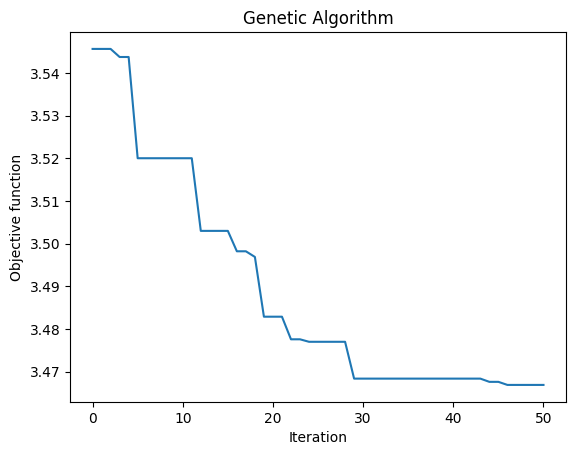

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from geneticalgorithm import geneticalgorithm as ga


varbound = np.array([          [10, 200],             # hidden size
                     [1, 3],                # number of layer
                     [0.0005, 0.002],            # learning rate
                     [0, 3],               # batch size
                     [0, 0.01],              # L2 norm
                     [3, 10],               # sequence length
                     [0, 0.2],              # dropout
                     [1, 3],               # time step   (remember less than the sequence length)
                     [0, 1]                # epoch
                     ])



# 创建遗传算法对象
algorithm_param = {'max_num_iteration': 50, 'population_size': 20, 'elit_ratio': 0.01,
                   'parents_portion': 0.3, 'crossover_probability': 0.5, 'mutation_probability': 0.1,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 15}
model = ga(function=LSTM_fitness_function, dimension=9, variable_type='real',
           variable_type_mixed  = np.array(['int', 'int', 'real', 'int', 'real', 'int', 'real', 'int', 'int']) ,variable_boundaries=varbound,
           algorithm_parameters=algorithm_param, function_timeout = 500)

# 运行遗传算法进行优化
model.run()

# 获得优化的超参数组合
best_params = model.output_dict['variable']




In [30]:
# Defince the parameters
hidden_size = int(1.76000000e+02)
num_layers = int(1.00000000e+00)
learning_rate = 5.49978933e-04
batch_size = [32, 64, 128, 256][0]
weight_decay = 5.34983106e-03
sequence_length = 10
dropout = 1.90420305e-01
time_step = 3
epoch = [500, 1000][int(1.00000000e+00)]


X_reshape, y_reshape = reshape_data(X, y, sequence_length)

# 划分训练集为新的训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_reshape, test_size=0.2, random_state=42)

# 划分训练集为新的训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



torch.manual_seed(42)  # set the random seed

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


# Specify the batch size
batch_size = batch_size

# Create DataLoaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

#print(X_train.shape)
#print(y_train.shape)

# 初始化模型和优化器
input_size = X_train.shape[2]
output_size = y_train.shape[1]
#device = torch.device("cuda")
model = LSTMModel(input_size, hidden_size, num_layers, output_size, time_step, dropout).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.MSELoss()
num_epochs = epoch

# train!!!
best_model_state = train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=num_epochs, patience=30, delta=0.005)
#print('this is :', best_model_state)
#model.load_state_dict(best_model_state)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.190420305 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!


In [31]:
def median_absolute_error(y_true, y_pred):
    absolute_errors = torch.abs(y_true - y_pred)
    return torch.median(absolute_errors).item()

In [32]:
def pearson_correlation(y_true, y_pred):
    y_true_mean = torch.mean(y_true)
    y_pred_mean = torch.mean(y_pred)
    numerator = torch.sum((y_true - y_true_mean) * (y_pred - y_pred_mean))
    denominator = torch.sqrt(torch.sum((y_true - y_true_mean) ** 2)) * torch.sqrt(torch.sum((y_pred - y_pred_mean) ** 2))
    pearson_corr = numerator / denominator
    return pearson_corr.item()

In [33]:
def index_of_agreement(y_true, y_pred):
    numerator = torch.sum((y_true - y_pred) ** 2)
    denominator = torch.sum((torch.abs(y_pred - torch.mean(y_true)) + torch.abs(y_true - torch.mean(y_true))) ** 2)
    index_agreement = 1 - (numerator / denominator)
    return index_agreement.item()

In [34]:
model.eval()

with torch.no_grad():
    total_mse = 0.0
    total_mae = 0.0
    total_md_ae = 0.0
    total_mape = 0.0
    total_rmspe = 0.0
    total_pearson_corr = 0.0
    total_index_agreement = 0.0

    for batch_X, batch_y in test_loader:
        # Forward pass: compute model predictions
        predictions = model(batch_X.to(device))

        # Compute the loss (assuming you have defined the loss function as 'criterion')
        mse = criterion(predictions, batch_y.to(device))
        total_mse += mse.item()

        # Compute the loss (MAE)
        mae = torch.mean(torch.abs(predictions - batch_y.to(device)))
        total_mae += mae.item()

        # Compute the loss (MdAE)
        md_ae = median_absolute_error(predictions, batch_y.to(device))
        total_md_ae += md_ae

        # Compute the loss (MAPE)
        absolute_percentage_errors = torch.abs((batch_y.to(device) - predictions) / batch_y.to(device))
        absolute_percentage_errors = absolute_percentage_errors[~torch.isinf(absolute_percentage_errors) & ~torch.isnan(absolute_percentage_errors)]
        mape = torch.mean(absolute_percentage_errors).item() * 100
        total_mape += mape

        # Compute the loss (RMSPE)
        squared_percentage_errors = ((batch_y.to(device) - predictions) / batch_y.to(device)) ** 2
        squared_percentage_errors = squared_percentage_errors[~torch.isinf(squared_percentage_errors)]
        rmspe = torch.sqrt(torch.mean(squared_percentage_errors)).item() * 100
        total_rmspe += rmspe

        # Compute the Pearson Correlation Coefficient
        pearson_corr = pearson_correlation(batch_y.to(device), predictions)
        total_pearson_corr += pearson_corr

        # Compute the Index of Agreement
        index_agreement = index_of_agreement(batch_y.to(device), predictions)
        total_index_agreement += index_agreement





        # Calculate the average loss for the entire validation set
        #print(total_mse)
    mse_loss = total_mse / len(test_loader)
    mae_loss = total_mae / len(test_loader)
    rmse_loss = np.sqrt(mse_loss)
    md_ae_loss = total_md_ae / len(test_loader)
    mape_loss = total_mape / len(test_loader)
    rmspe_loss = total_rmspe / len(test_loader)
    pearson_corr_avg = total_pearson_corr / len(test_loader)
    index_agreement_avg = total_index_agreement / len(test_loader)

print(f'MSE: {mse_loss:.4f}')
print(f'RMSE: {mae_loss:.4f}')
print(f'MAE: {rmse_loss:.4f}')
print(f'MdAE: {md_ae_loss:.4f}')
print(f'MAPE: {mape_loss:.4f}')
print(f'RMSPE: {rmspe_loss:.4f}')
print(f'Pearson Coefficient: {pearson_corr_avg:.4f}')
print(f'Index of Agreement (IoA): {index_agreement_avg:.4f}')


MSE: 3.5532
RMSE: 1.4381
MAE: 1.8850
MdAE: 1.1004
MAPE: 27.4335
RMSPE: 86.3104
Pearson Coefficient: 0.9412
Index of Agreement (IoA): 0.9677
